In [ ]:
!pip install tensorflow==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully u

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! unzip "/content/gdrive/MyDrive/Deep Learning/Covid19-dataset.zip"

Archive:  /content/gdrive/MyDrive/Deep Learning/Covid19-dataset.zip
   creating: Covid19-dataset/
   creating: Covid19-dataset/test/
   creating: Covid19-dataset/test/Covid/
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/auntminnie-2020_

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
import numpy as np
import argparse
import cv2
import os
from imutils import paths

In [ ]:
from imutils import paths

corona_train_ImagePaths = list(paths.list_images('/content/Covid19-dataset/train/Covid'))

In [ ]:
len(corona_train_ImagePaths)

111

In [ ]:
import numpy as np

valid_Images = np.random.choice(corona_train_ImagePaths, size=20, replace=False)

In [ ]:
len(valid_Images)

20

In [ ]:
for i in valid_Images:
  if i in corona_train_ImagePaths:
    corona_train_ImagePaths.remove(i)

In [ ]:
len(corona_train_ImagePaths)

91

In [ ]:
import os
import shutil
import cv2
from PIL import Image
covid_19_path = '/content/Covid19-dataset/train/Covid'
train_folder_path = '/content/gdrive/MyDrive/Deep Learning/train'
for image in corona_train_ImagePaths:
  i = os.path.split(image)[-1]
  cur_image_path = os.path.join(covid_19_path, i)
  cur_image_out_path = os.path.join(train_folder_path, i)
  shutil.copyfile(cur_image_path, cur_image_out_path)
  # cv2.imwrite(train_folder_path,image)
  # img.save(f"{train_folder_path}/{image}")


## Load the dataset for training and validation and after it performing normalisation on it

In [ ]:
corona_train_ImagePaths = list(paths.list_images('/content/Covid19-dataset/train/Covid'))
normal_train_ImagePaths = list(paths.list_images('/content/Covid19-dataset/train/Normal'))
data = []
labels = []

for imagePath in corona_train_ImagePaths:
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224,224))
  data.append(image)
  labels.append('corona')

for imagePath in normal_train_ImagePaths:
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append('normal')

print(corona_train_ImagePaths)
 

['/content/Covid19-dataset/train/Covid/043.jpeg', '/content/Covid19-dataset/train/Covid/02.jpeg', '/content/Covid19-dataset/train/Covid/041.jpeg', '/content/Covid19-dataset/train/Covid/062.jpeg', '/content/Covid19-dataset/train/Covid/044.jpeg', '/content/Covid19-dataset/train/Covid/080.jpg', '/content/Covid19-dataset/train/Covid/COVID-00028.jpg', '/content/Covid19-dataset/train/Covid/COVID-00023.jpg', '/content/Covid19-dataset/train/Covid/090.jpeg', '/content/Covid19-dataset/train/Covid/052.jpeg', '/content/Covid19-dataset/train/Covid/046.jpeg', '/content/Covid19-dataset/train/Covid/042.jpeg', '/content/Covid19-dataset/train/Covid/COVID-00009.jpg', '/content/Covid19-dataset/train/Covid/022.jpeg', '/content/Covid19-dataset/train/Covid/COVID-00037.jpg', '/content/Covid19-dataset/train/Covid/040.jpeg', '/content/Covid19-dataset/train/Covid/COVID-00031.jpg', '/content/Covid19-dataset/train/Covid/065.jpeg', '/content/Covid19-dataset/train/Covid/025.jpeg', '/content/Covid19-dataset/train/Cov

In [ ]:
corona_val_ImagePaths = list(paths.list_images('/content/Covid19-dataset/test/Covid'))
len(corona_val_ImagePaths)

26

In [ ]:
corona_val_ImagePaths = list(paths.list_images('/content/Covid19-dataset/test/Covid'))
normal_val_ImagePaths = list(paths.list_images('/content/Covid19-dataset/test/Normal'))

for imagePath in corona_val_ImagePaths:
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224,224))
  data.append(image)
  labels.append('corona')

for imagePath in normal_val_ImagePaths:
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append('normal')

data = np.array(data) / 255
labels = np.array(labels)

print(labels)

['corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona' 'corona'
 'corona' 'corona' 'corona' 'corona' 'corona' 'coro

## Now perform label binarizer for the target class

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

trainX, testX, trainY, testY = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

## Now create the model and add layers

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


## Configure the optimizer and compiler

In [ ]:
INIT_LR = 1e-3
EPOCHS = 20
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
#annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS, epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-10-8b56a90b611e>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/20
5/5 [==============================] - 19s 2s/step - loss: 0.8279 - accuracy: 0.4564 - val_loss: 0.6847 - val_accuracy: 0.6957
Epoch 2/20
5/5 [==============================] - 2s 391ms/step - loss: 0.7061 - accuracy: 0.5705 - val_loss: 0.6508 - val_accuracy: 0.6087
Epoch 3/20
5/5 [==============================] - 3s 527ms/step - loss: 0.6573 - accuracy: 0.6376 - val_loss: 0.6163 - val_accuracy: 0.6087
Epoch 4/20
5/5 [==============================] - 2s 390ms/step - loss: 0.6502 - accuracy: 0.6174 - val_loss: 0.5856 - val_accuracy: 0.6304
Epoch 5/20
5/5 [==============================] - 2s 385ms/step - loss: 0.6357 - accuracy: 0.6174 - val_loss: 0.5579 - val_accuracy: 0.8261
Epoch 6/20
5/5 [==============================] - 2s 395ms/step - loss: 0.6214 - accuracy: 0.6687 - val_loss: 0.5425 - val_accuracy: 0.8913
Epoch 7/20
5/5 [==============================] - 2s 417ms/step - loss: 0.5613 - accuracy: 0.7937 - val_loss: 0.5262 - val_accuracy: 0.8696
Epoch 8/20
5/5 [======

##Check the change in accuracy and the loss function with graph of graph

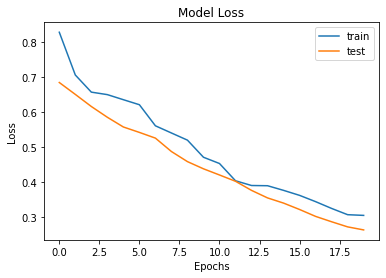

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

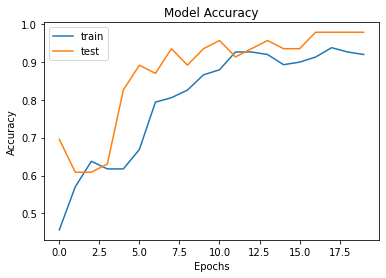

In [ ]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Evaluating the network on basis of different parameters

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
2/2 [==============================] - 3s 2s/step
              precision    recall  f1-score   support

      corona       1.00      0.96      0.98        28
      normal       0.95      1.00      0.97        18

    accuracy                           0.98        46
   macro avg       0.97      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [ ]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[27  1]
 [ 0 18]]
acc: 0.9783
sensitivity: 0.9643
specificity: 1.0000


## Testing the model

In [ ]:
data_test

NameError: ignored